In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import sys, os
sys.path.append(os.path.join(os.path.dirname('Demand'), '..', 'src'))
from Demand import Demand

In [2]:
path = '../data/demand_lower_48'

In [3]:
nat_dem = Demand()

In [4]:
nat_dem.load_and_clean_data(path)

In [5]:
df = nat_dem.dataframe

In [6]:
df.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
Time,,,,,,,
2015-07-01 02:00:00,335153,2015,7,2,2,1,182
2015-07-01 03:00:00,333837,2015,7,3,2,1,182
2015-07-01 04:00:00,398386,2015,7,4,2,1,182
2015-07-01 05:00:00,388954,2015,7,5,2,1,182
2015-07-01 06:00:00,392487,2015,7,6,2,1,182


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50179 entries, 2015-07-01 02:00:00 to 2021-03-21 20:00:00
Data columns (total 7 columns):
Megawatthours    50179 non-null int64
Year             50179 non-null int64
Month            50179 non-null int64
Hour             50179 non-null int64
Day_of_week      50179 non-null int64
Day_of_month     50179 non-null int64
Day_of_year      50179 non-null int64
dtypes: int64(7)
memory usage: 3.1 MB


In [9]:
split_index = len(df)-48

In [10]:
mwh = pd.DataFrame(df['Megawatthours'])

In [11]:
mwh

,Megawatthours
Time,
2015-07-01 02:00:00,335153
2015-07-01 03:00:00,333837
2015-07-01 04:00:00,398386
2015-07-01 05:00:00,388954
2015-07-01 06:00:00,392487
2015-07-01 07:00:00,404647
2015-07-01 08:00:00,422227
2015-07-01 09:00:00,442131
2015-07-01 10:00:00,464371


In [12]:
train = mwh[:split_index]
test = mwh[split_index:]

In [13]:
train

,Megawatthours
Time,
2015-07-01 02:00:00,335153
2015-07-01 03:00:00,333837
2015-07-01 04:00:00,398386
2015-07-01 05:00:00,388954
2015-07-01 06:00:00,392487
2015-07-01 07:00:00,404647
2015-07-01 08:00:00,422227
2015-07-01 09:00:00,442131
2015-07-01 10:00:00,464371


In [14]:
test

,Megawatthours
Time,
2021-03-19 21:00:00,431516
2021-03-19 22:00:00,433811
2021-03-19 23:00:00,426394
2021-03-20 00:00:00,413240
2021-03-20 01:00:00,399315
2021-03-20 02:00:00,387261
2021-03-20 03:00:00,379083
2021-03-20 04:00:00,375400
2021-03-20 05:00:00,376103


In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [17]:
scaled_train

array([[0.14192568],
       [0.13897496],
       [0.28370561],
       ...,
       [0.31443697],
       [0.32127338],
       [0.33930277]])

In [18]:
scaled_test

array([[0.35798912],
       [0.36313493],
       [0.34650466],
       [0.31701099],
       [0.2857886 ],
       [0.25876133],
       [0.24042476],
       [0.2321668 ],
       [0.23374305],
       [0.24570286],
       [0.27084221],
       [0.30563191],
       [0.32939232],
       [0.33400001],
       [0.32375772],
       [0.30528662],
       [0.28453298],
       [0.25956851],
       [0.23753234],
       [0.22245815],
       [0.2182137 ],
       [0.22621605],
       [0.23757046],
       [0.25951022],
       [0.28564061],
       [0.29284699],
       [0.285672  ],
       [0.26451253],
       [0.23602111],
       [0.21244456],
       [0.19769773],
       [0.19026265],
       [0.19018193],
       [0.19908788],
       [0.21969802],
       [0.24657731],
       [0.26954623],
       [0.27842527],
       [0.27048794],
       [0.25687565],
       [0.24321852],
       [0.22596492],
       [0.21147818],
       [0.20517989],
       [0.20888398],
       [0.22443127],
       [0.24232837],
       [0.265

In [19]:
n_input = 5
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1000)

In [20]:
lstm_model = Sequential()

In [21]:
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dropout(.15))
lstm_model.add(Dense(1))
               
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(generator, epochs=10)

Epoch 1/10
51/51 [==============================] - 2s 35ms/step - loss: 0.0415
Epoch 2/10
51/51 [==============================] - 2s 35ms/step - loss: 0.0098
Epoch 3/10
51/51 [==============================] - 2s 34ms/step - loss: 0.0089
Epoch 4/10
51/51 [==============================] - 2s 34ms/step - loss: 0.0065
Epoch 5/10
51/51 [==============================] - 2s 35ms/step - loss: 0.0044
Epoch 6/10
51/51 [==============================] - 2s 34ms/step - loss: 0.0035
Epoch 7/10
51/51 [==============================] - 2s 34ms/step - loss: 0.0034
Epoch 8/10
51/51 [==============================] - 2s 33ms/step - loss: 0.0038
Epoch 9/10
51/51 [==============================] - 2s 34ms/step - loss: 0.0037
Epoch 10/10
51/51 [==============================] - 2s 36ms/step - loss: 0.0030


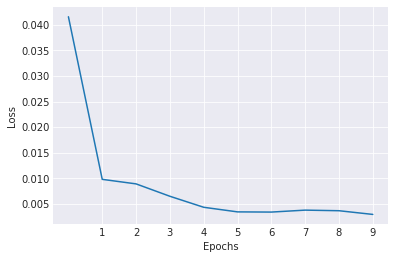

In [23]:
losses_lstm = lstm_model.history.history['loss']
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_xticks(np.arange(1,21))
ax.plot(range(len(losses_lstm)), losses_lstm);

In [24]:
lstm_predictions_scaled = []
batch = scaled_train[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(scaled_test)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis=1)
    print(current_batch)

[[[0.31473293]
  [0.31443697]
  [0.32127338]
  [0.33930277]
  [0.36016032]]]
[[[0.31443697]
  [0.32127338]
  [0.33930277]
  [0.36016032]
  [0.3820841 ]]]
[[[0.32127338]
  [0.33930277]
  [0.36016032]
  [0.3820841 ]
  [0.40639469]]]
[[[0.33930277]
  [0.36016032]
  [0.3820841 ]
  [0.40639469]
  [0.42989415]]]
[[[0.36016032]
  [0.3820841 ]
  [0.40639469]
  [0.42989415]
  [0.45130476]]]
[[[0.3820841 ]
  [0.40639469]
  [0.42989415]
  [0.45130476]
  [0.47146767]]]
[[[0.40639469]
  [0.42989415]
  [0.45130476]
  [0.47146767]
  [0.48932824]]]
[[[0.42989415]
  [0.45130476]
  [0.47146767]
  [0.48932824]
  [0.5044235 ]]]
[[[0.45130476]
  [0.47146767]
  [0.48932824]
  [0.5044235 ]
  [0.51730573]]]
[[[0.47146767]
  [0.48932824]
  [0.5044235 ]
  [0.51730573]
  [0.52774823]]]
[[[0.48932824]
  [0.5044235 ]
  [0.51730573]
  [0.52774823]
  [0.5356434 ]]]
[[[0.5044235 ]
  [0.51730573]
  [0.52774823]
  [0.5356434 ]
  [0.5412147 ]]]
[[[0.51730573]
  [0.52774823]
  [0.5356434 ]
  [0.5412147 ]
  [0.54461098]]]

In [25]:
lstm_predictions_scaled

[array([0.36016032], dtype=float32),
 array([0.3820841], dtype=float32),
 array([0.4063947], dtype=float32),
 array([0.42989415], dtype=float32),
 array([0.45130476], dtype=float32),
 array([0.47146767], dtype=float32),
 array([0.48932824], dtype=float32),
 array([0.5044235], dtype=float32),
 array([0.51730573], dtype=float32),
 array([0.5277482], dtype=float32),
 array([0.5356434], dtype=float32),
 array([0.5412147], dtype=float32),
 array([0.544611], dtype=float32),
 array([0.5458767], dtype=float32),
 array([0.54534525], dtype=float32),
 array([0.543266], dtype=float32),
 array([0.53987306], dtype=float32),
 array([0.5355103], dtype=float32),
 array([0.53049874], dtype=float32),
 array([0.5251055], dtype=float32),
 array([0.5196373], dtype=float32),
 array([0.5143509], dtype=float32),
 array([0.50944173], dtype=float32),
 array([0.5050842], dtype=float32),
 array([0.50139916], dtype=float32),
 array([0.4984448], dtype=float32),
 array([0.49624786], dtype=float32),
 array([0.49479395

In [26]:
unscaled_preds = scaler.inverse_transform(lstm_predictions_scaled)
unscaled_preds

array([[432484.34220284],
       [442262.21673697],
       [453104.59349459],
       [463585.21122444],
       [473134.21671718],
       [482126.75369918],
       [490092.45701355],
       [496824.85406089],
       [502570.25253654],
       [507227.54280591],
       [510748.74198735],
       [513233.51092482],
       [514748.22815323],
       [515312.72482479],
       [515075.70799768],
       [514148.37567413],
       [512635.1471113 ],
       [510689.38144732],
       [508454.25641108],
       [506048.89183235],
       [503610.112028  ],
       [501252.41133118],
       [499062.95642829],
       [497119.53009593],
       [495476.01671147],
       [494158.38817263],
       [493178.5670957 ],
       [492530.13361037],
       [492189.20260906],
       [492123.70132351],
       [492294.27315742],
       [492655.69989377],
       [493162.6569823 ],
       [493771.01612186],
       [494438.6294682 ],
       [495127.98796535],
       [495806.89922011],
       [496448.19508564],
       [4970

In [27]:
test

,Megawatthours
Time,
2021-03-19 21:00:00,431516
2021-03-19 22:00:00,433811
2021-03-19 23:00:00,426394
2021-03-20 00:00:00,413240
2021-03-20 01:00:00,399315
2021-03-20 02:00:00,387261
2021-03-20 03:00:00,379083
2021-03-20 04:00:00,375400
2021-03-20 05:00:00,376103
